In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy import stats

In [95]:
df = pd.read_csv("UCMF_100.csv")

df.replace(0, np.nan, inplace=True)
df.describe(include='all')


,ID,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,...,PPA,NORMAL X ANORMAL,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
count,99.000000,86.000000,75.000000,73.000000,97,97,95.000000,80,92,60.000000,...,97,94,94,94,90.000000,77,9,99,95,69
unique,NaN,NaN,NaN,NaN,93,94,NaN,30,1,NaN,...,6,2,4,3,NaN,7,4,3,4,12
top,NaN,NaN,NaN,NaN,11/05/06,29/03/91,NaN,UR,Normais,NaN,...,Não Calculado,Anormal,Normal,ausente,NaN,Assintomático,Dispneia,M,5 - Parecer cardiológico,5 - Cirurgia
freq,NaN,NaN,NaN,NaN,2,2,NaN,19,92,NaN,...,51,50,88,55,NaN,54,5,64,44,19
mean,50.000000,25.294186,112.906667,17.890411,NaN,NaN,6.546211,NaN,NaN,101.083333,...,NaN,NaN,NaN,NaN,92.011111,NaN,NaN,NaN,NaN,NaN
std,28.722813,16.928774,34.439596,3.285328,NaN,NaN,4.936142,NaN,NaN,11.647785,...,NaN,NaN,NaN,NaN,18.142689,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,50.000000,10.000000,NaN,NaN,-4.050000,NaN,NaN,80.000000,...,NaN,NaN,NaN,NaN,52.000000,NaN,NaN,NaN,NaN,NaN
25%,25.500000,13.000000,93.500000,16.000000,NaN,NaN,3.125000,NaN,NaN,90.000000,...,NaN,NaN,NaN,NaN,78.500000,NaN,NaN,NaN,NaN,NaN
50%,50.000000,21.000000,116.000000,17.000000,NaN,NaN,5.990000,NaN,NaN,100.000000,...,NaN,NaN,NaN,NaN,89.000000,NaN,NaN,NaN,NaN,NaN
75%,74.500000,36.450000,142.500000,20.000000,NaN,NaN,9.805000,NaN,NaN,106.250000,...,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,NaN


# Missing values

In [96]:
mv = np.where(pd.isnull(df))

print(f"rows with missing values: {len(np.unique(mv[0]))}")
print(f"columns with missing values: {len(np.unique(mv[1]))}")

rows with missing values: 97
columns with missing values: 19


One possible solution for the missing data is data imputation in the code bellow we use the mean of the columns with numerical values and the mode of columns with non numerical values.

In [97]:
numerical_cols = df.select_dtypes(include='number')
imputer = SimpleImputer(strategy='mean')
df[numerical_cols.columns] = imputer.fit_transform(numerical_cols)


categorical_cols = df.select_dtypes(exclude='number')
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols.columns] = imputer.fit_transform(categorical_cols)

mv = np.where(pd.isnull(df))
print(f"rows with missing values: {len(np.unique(mv[0]))}")
print(f"columns with missing values: {len(np.unique(mv[1]))}")

rows with missing values: 0
columns with missing values: 0


# Negative values
We can see that the columns "idade" has negative values witch is not possible, we will replace the values with the median of the ages.

In [98]:
median = df['IDADE'].median()
df['IDADE'] = df['IDADE'].apply(lambda x: median if x < 0 else x)
df['IDADE'].describe()

count    99.000000
mean      6.650150
std       4.713314
min       0.010000
25%       3.220000
50%       6.240000
75%       9.630000
max      21.170000
Name: IDADE, dtype: float64

# Outliers
To deal with outliers we can user the quartiles: we calculate the inter quartile range and consider values that are 1.5 times or more bigger than q3 or 1.5 times or more smaller than q1 outliers and replace them with the median.

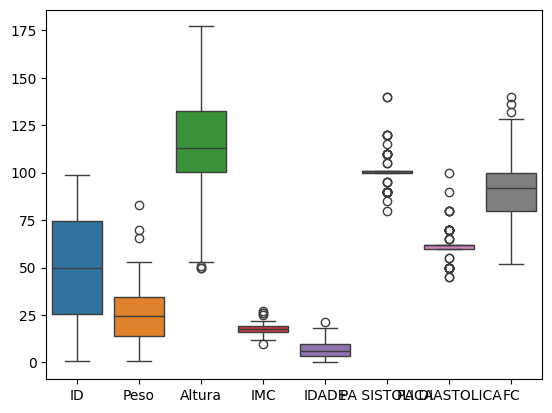

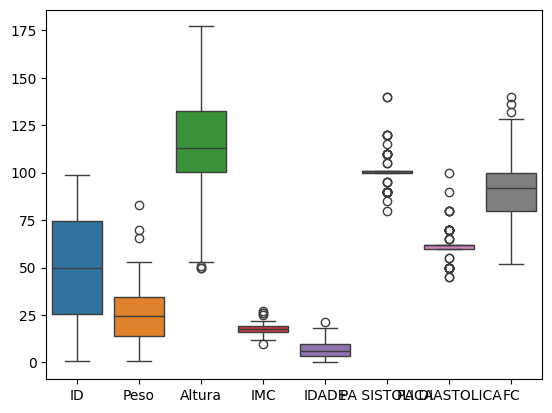

rows with missing values: 0
columns with missing values: 0


In [99]:
sns.boxplot(df)
plt.show()

def remove_outliers(df):
    
    df_no_outliers = df.copy()
    numerical_cols = df_no_outliers.select_dtypes(include=[np.number])
    
    for col in numerical_cols.columns: 
        q1, q3 = np.percentile(df_no_outliers[col],[25,75])
        iqr = q3-q1

        df_no_outliers[col] = df_no_outliers[col][df_no_outliers[col]< q3 + 1.5*iqr] 
        df_no_outliers[col] = df_no_outliers[col][df_no_outliers[col]> q1 - 1.5*iqr]

    imputer = SimpleImputer(strategy='median')    
    df_no_outliers[numerical_cols.columns] = imputer.fit_transform(numerical_cols) 
    return df_no_outliers

df = remove_outliers(df)

sns.boxplot(df)
plt.show()

mv = np.where(pd.isnull(df))
print(f"rows with missing values: {len(np.unique(mv[0]))}")
print(f"columns with missing values: {len(np.unique(mv[1]))}")


# Data reduction
In this data we can see that the column ID would not be of any value to us so we can remove it making the data smaller.

In [100]:
if 'ID' in df:
    df =df.drop('ID',axis=1)
    
df.describe()

,Peso,Altura,IMC,IDADE,PA SISTOLICA,PA DIASTOLICA,FC
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,25.294186,112.906667,17.890411,6.650150,101.083333,61.916667,92.011111
std,15.766015,29.926841,2.815995,4.713314,9.037667,8.178234,17.289548
min,1.000000,50.000000,10.000000,0.010000,80.000000,45.000000,52.000000
25%,14.000000,100.500000,16.000000,3.220000,100.000000,60.000000,80.000000
50%,24.600000,112.906667,17.890411,6.240000,101.083333,61.916667,92.000000
75%,34.250000,132.500000,19.000000,9.630000,101.083333,61.916667,100.000000
max,83.000000,177.000000,27.000000,21.170000,140.000000,100.000000,140.000000


# Normalization
To help our models achieve better results we can normalize the data so calculating the distance using different columns is easier.

In [101]:
numerical_cols = df.select_dtypes(include=[np.number])
for col in numerical_cols.columns: 
    df[col] = df[col]  / df[col].abs().max() 

df.describe()

,Peso,Altura,IMC,IDADE,PA SISTOLICA,PA DIASTOLICA,FC
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,0.304749,0.637891,0.662608,0.314131,0.722024,0.619167,0.657222
std,0.189952,0.169078,0.104296,0.222641,0.064555,0.081782,0.123497
min,0.012048,0.282486,0.370370,0.000472,0.571429,0.450000,0.371429
25%,0.168675,0.567797,0.592593,0.152102,0.714286,0.600000,0.571429
50%,0.296386,0.637891,0.662608,0.294757,0.722024,0.619167,0.657143
75%,0.412651,0.748588,0.703704,0.454889,0.722024,0.619167,0.714286
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
df.to_csv("new_data.csv",index=False)